# The Framingham Heart Study

## Project Outline:
- I'll explore the Framingham Heart Study.
- Create visual exploratory analysis.
- Use machine learning to predict the 10 year risk factors.

## Introduction

__What is the Framingham Heart Study?__

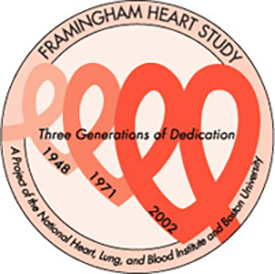

The Framingham Heart Study was a turning point in identifying the risk factors of heart disease, and this is one of the most epedemiological studies studies conducted.

A lot of our present understanding of cardiovascular disease can be attributed to this study.

The Framingham Heart Study (FHS) was established in the late 1940's. It was a joint project of Boston University and the National Heart, Lung, and Blood Institute (NHLBI). The aim of the strudy was to enroll people free of the disease , and see who developed the disease in 20 years. Eevery two years, the participants would have to report to a testing center, where an examination was conducted. The patients were examined and their health information was updated. They were also given questionnaires to fill up, in which they updated behavioral information, such as exercise or smoking habits. 

The data collected from this study allowed for a better understanding of the risk factors of heart disease. medical interventoin then took place based on the findings of the FHS.

Around 20 years after the original cohort, a second study was started. The study involved the offspring of the first cohort and their spouses, and took place in 1971.

In the year 2002, the third generation cohort started, who were the grandchildren of the original cohort. The study is ongoing, and has expanded to take in various otehr risk factors such as family history, social network analysis, and genetic information.

## Dataset Description

The dataset consist of 16 variables; 15 independent variables, or risk factors and 1 independent variable. They are the following:
* male: A value pf 1 indicates that the participant is male, 0 indicates a frmale.
* age: The age of the participant.
* education: 1-High School, 2-High School Diploma/GED, 3-College, 4-Degree.
* currentSmoker: 1=The participant is a current smoker, 0-participant does not smoke currently.
* cigsPerDay: Number of cigarettes smoked per day.
* BPMeds: Amount of BP medication the participant is on.
* prevalentStroke: 0-no prevalence of stroke, 1-has had occurrences of stroke.
* prevalentHyp: 0-no prevalence of hypertension, 1-prevalence of hypertension
* diabetes: 0-no diabetes, 1-has diabetes.
* totChol: Total Cholestrol.
* sysBP: Systolic Blood Pressure.
* diaBP: Diastolic Blood Pressure.
* BMI: Body Mass Index.
* heartRate: Heart rate in bpm.
* glucose: Glucose level (mg/dL).

## Exploring the Data

In [11]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading and viewing the data

framingham = pd.read_csv('/Users/ahmedahmed/Desktop/framingham.csv')

framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [29]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [30]:
framingham.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Exploratory Data Visualization

<AxesSubplot:xlabel='education', ylabel='count'>

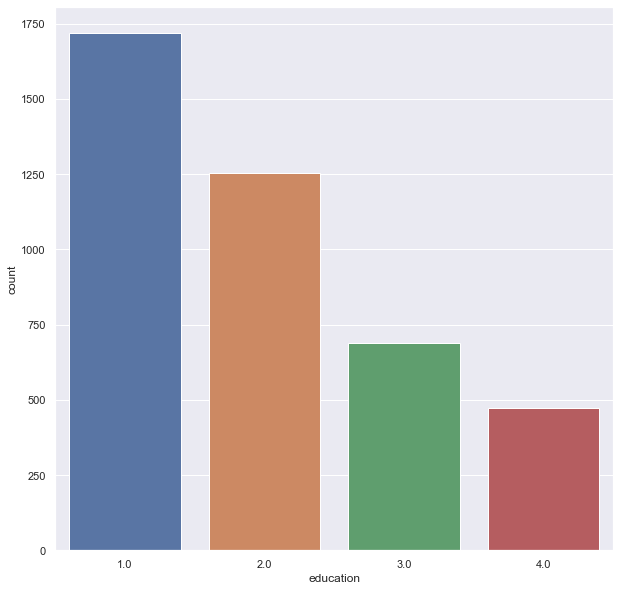

In [20]:
# countplot to show the level of eductaion of the participants

sns.set()
plt.figure(figsize=(10,10))
sns.countplot(data=framingham, x='education')

Most participants are of High School education. A few have a Diploma, College or a Degree.

<AxesSubplot:xlabel='TenYearCHD', ylabel='cigsPerDay'>

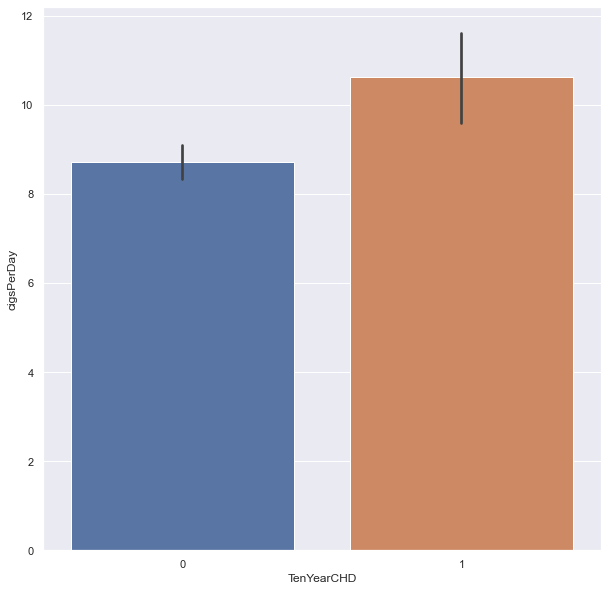

In [22]:
# Let's look at the relation between the 10 year risk and smoking

plt.figure(figsize=(10,10))
sns.barplot(data=framingham, x='TenYearCHD', y='cigsPerDay')

Participants who have a ten year CHD risk smoke more cigarretes per day than whose who don't

<AxesSubplot:xlabel='TenYearCHD', ylabel='age'>

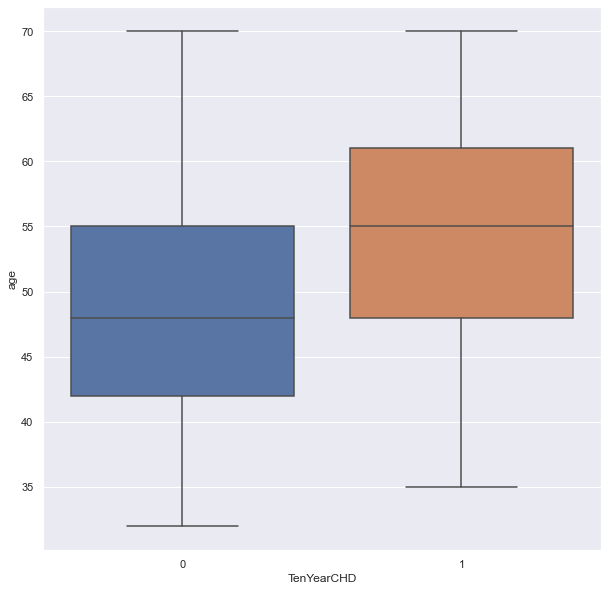

In [24]:
# Let's explore the relation between the ten year CHD risk and age

plt.figure(figsize=(10,10))
sns.boxplot(data=framingham, x='TenYearCHD', y='age')


It can be seen from the boxplots the distribution of the 10 year risk factor is mostly spread around 47-62 years old. 

<AxesSubplot:xlabel='TenYearCHD', ylabel='age'>

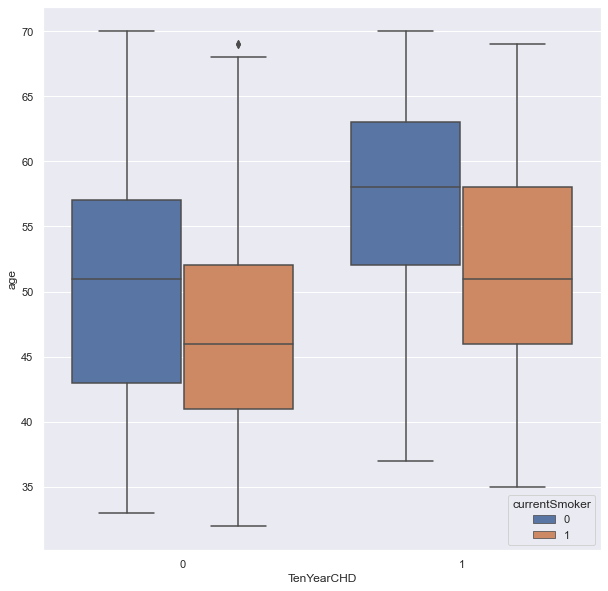

In [25]:
# Let's add the smoking as a third parameter to our boxplot

plt.figure(figsize=(10,10))
sns.boxplot(data=framingham, x='TenYearCHD', y='age', hue='currentSmoker')

Smoker seem to be at a larger risk of developing CHD at a younger age as compared to non-smokers.

<AxesSubplot:xlabel='TenYearCHD', ylabel='age'>

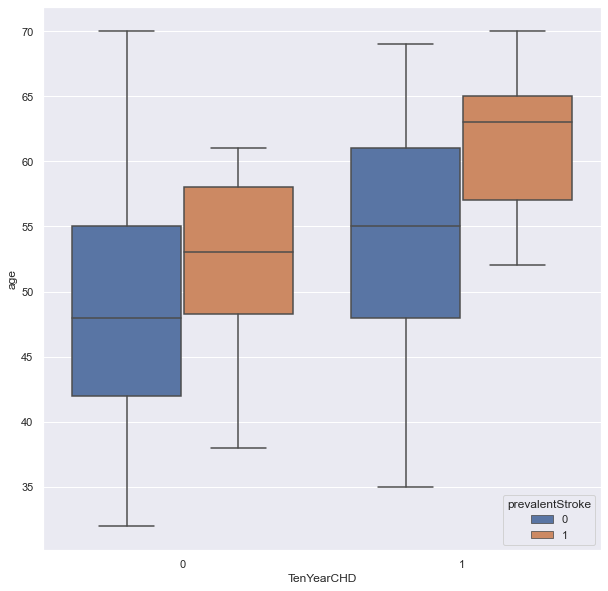

In [26]:
# Let's add the prevalent stroke as our hue and explore

plt.figure(figsize=(10,10))
sns.boxplot(data=framingham, x='TenYearCHD', y='age', hue='prevalentStroke')

Strokes are more prevalent or have a higher chance of occurring at older ages

<AxesSubplot:xlabel='TenYearCHD', ylabel='age'>

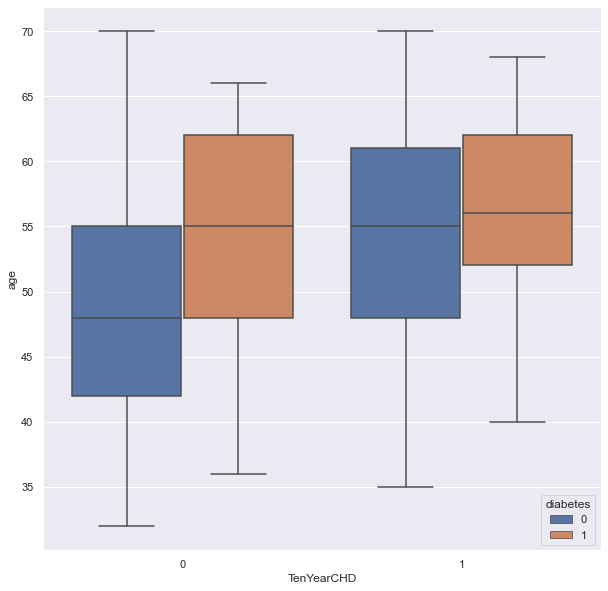

In [27]:
# Lets use diabetes as our hue 

plt.figure(figsize=(10,10))
sns.boxplot(data=framingham, x='TenYearCHD', y='age', hue='diabetes')

An older participant is more likely to have diabetes than a younger one

<AxesSubplot:xlabel='TenYearCHD', ylabel='totChol'>

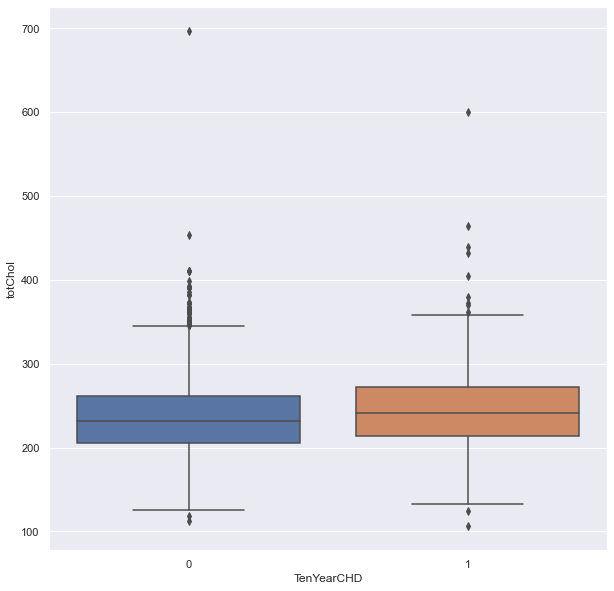

In [28]:
# Lets explore the relation between the TenYearCHD and totChol

plt.figure(figsize=(10,10))
sns.boxplot(data=framingham, x='TenYearCHD', y='totChol')

Participants with a ten year CHD risk have a slghtly higher cholesterol levels than participants who don't. 

<AxesSubplot:xlabel='TenYearCHD', ylabel='sysBP'>

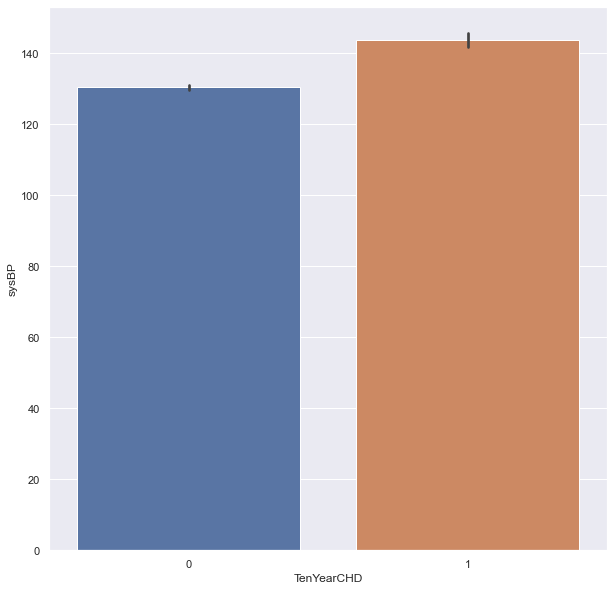

In [32]:
# Lets see the systolic affect on the TenYearCHD

plt.figure(figsize=(10,10))
sns.barplot(data=framingham, x='TenYearCHD', y='sysBP')

<AxesSubplot:xlabel='TenYearCHD', ylabel='diaBP'>

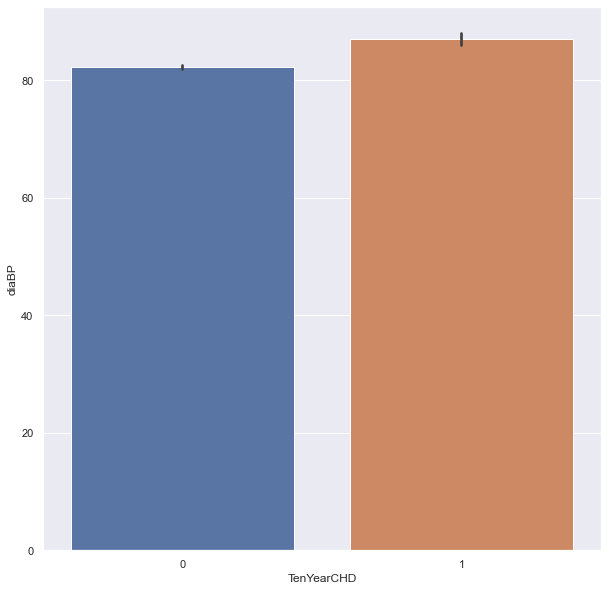

In [34]:
# Lets see the diastolic impact on the TenYearCHD 

plt.figure(figsize=(10,10))
sns.barplot(data=framingham, x='TenYearCHD', y='diaBP')

Blood pressure does seem to be linked with coronary heart disease. Participants with a ten year CHD risk seem to have higher blood pressure than the ones who don't

<AxesSubplot:xlabel='TenYearCHD', ylabel='BMI'>

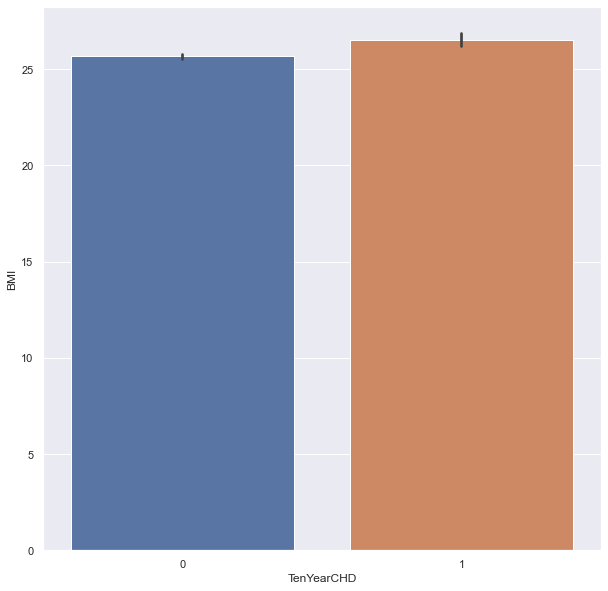

In [35]:
# Lets explore the affect of BMI on the TenYearCHD

plt.figure(figsize=(10,10))
sns.barplot(data=framingham, x='TenYearCHD', y='BMI')

Participants with a ten year CHD risk have a slightly higher BMI (Body Mass Index) than participants who don't.

<AxesSubplot:xlabel='TenYearCHD', ylabel='BPMeds'>

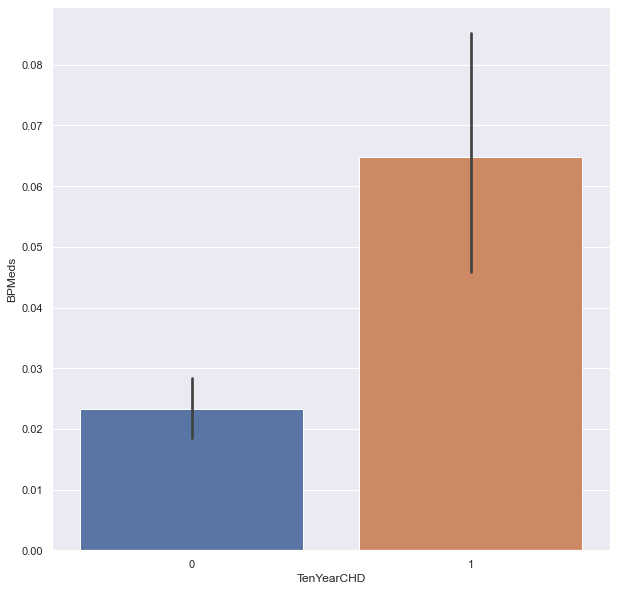

In [37]:
# Lets explore the affect of Blood Pressure Meds on the Ten Year CHD 

plt.figure(figsize=(10,10))
sns.barplot(data=framingham, x='TenYearCHD', y='BPMeds')

A higher dosage of Blood Pressure Medications is associated a larger ten year CHD risk.

## Data PreProcessing

In [39]:
framingham.shape

(4240, 16)

In [38]:
# Lets see how many null values we have in our dataset

framingham.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [40]:
# Lets drop the null values 

framingham.dropna(inplace=True)

In [41]:
framingham.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [51]:
framingham['TenYearCHD'].value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

Our target variable is imbalanced, and more than 80% of teh data is of participants who don't have a ten year CHD risk.

To overcome this, i did both: oversampling and undersampling. Then, i created a pipeline for a decision tree classifier

In [68]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [62]:
# Lets split our dataset into training and testing

from sklearn.model_selection import train_test_split

X = framingham.drop('TenYearCHD', axis=1)
y = framingham['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Over and Under Sampling

In [69]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

In [71]:
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

## Fitting the Data to the Pipeline

In [72]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', DecisionTreeClassifier())])

## Making Predictions on Test Data

In [73]:
pipe_pred = pipeline.predict(X_test)
pipe_pred

array([1, 0, 0, ..., 0, 1, 1])

## Evaluating the Model

In [74]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(pipe_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       779
           1       1.00      0.85      0.92      1082

    accuracy                           0.91      1861
   macro avg       0.92      0.93      0.91      1861
weighted avg       0.93      0.91      0.92      1861



## Saving the Model

In [75]:
import joblib

In [76]:
# save the model as a pickle in a file

joblib.dump(pipeline, 'fhs_pipeline.pkl')

['fhs_pipeline.pkl']